# Advanced Data Visualization with Seaborn and Plotly

## Learning Objectives
- Learn how to use Seaborn and Plotly for advanced and interactive visualizations
- Apply statistical visualization techniques

---

## Setup and Data Loading
We'll use the classic **Iris dataset** for its simplicity and clean structure, ideal for multi-variate visualization.


In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")

--- 

## Example 1: Seaborn Pairplot for Visualizing Relationships

**Goal:** Explore relationships between numerical variables grouped by species.

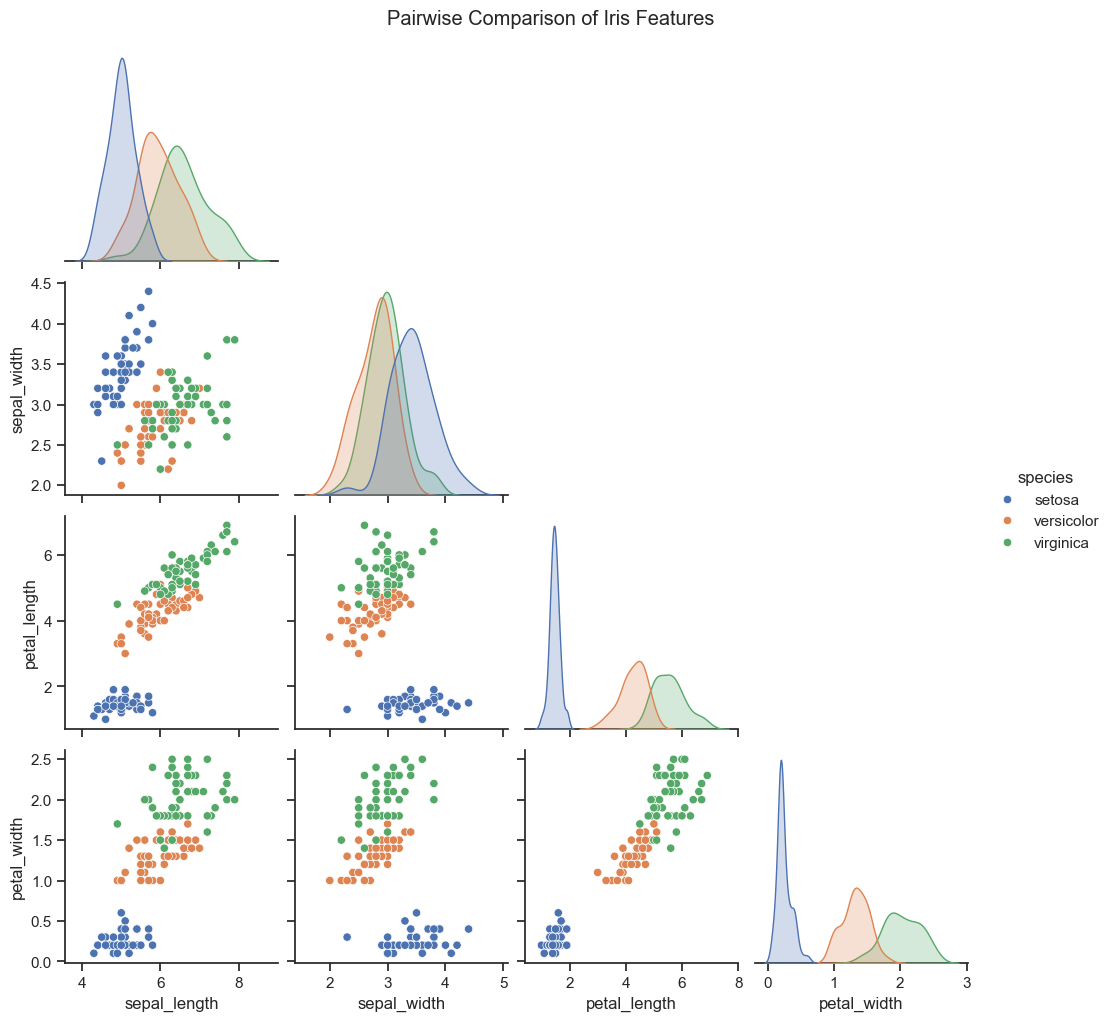

In [5]:
sns.set(style="ticks")
sns.pairplot(iris, hue="species", corner=True)
plt.suptitle("Pairwise Comparison of Iris Features", y=1.02)
plt.show()

- `pairplot()` draws scatter plots between all pairs of numeric columns.
- Color-coded by species.
- Corner=True avoids redundant upper triangle.


---

## Example 2: Seaborn Boxplot + Stripplot for Distribution & Outliers

**Goal:** Compare petal length across species.

C:\Users\haboa\AppData\Local\Temp\ipykernel_35916\1440468257.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=iris, x="species", y="petal_length", hue="species",


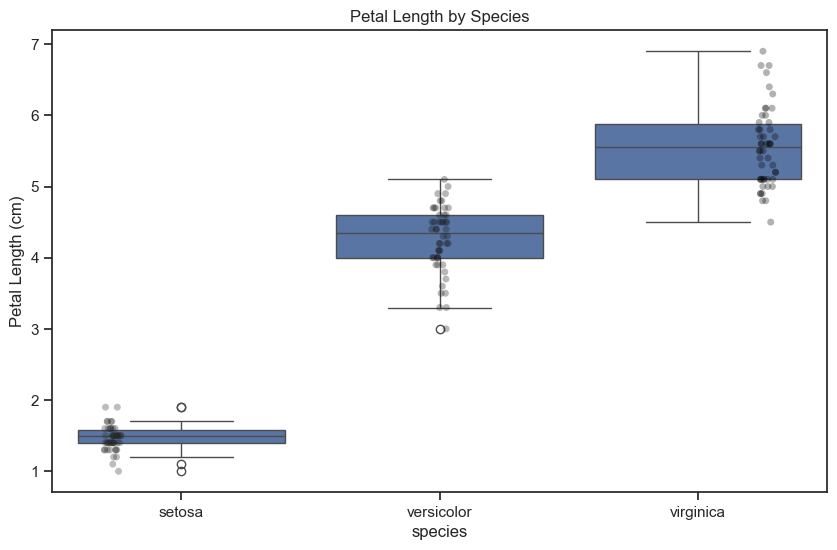

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x="species", y="petal_length")
sns.stripplot(data=iris, x="species", y="petal_length", hue="species", 
              dodge=True, color="black", alpha=0.3)
plt.title("Petal Length by Species")
plt.ylabel("Petal Length (cm)")
plt.legend([], [], frameon=False)
plt.show()

### Explanation:
- `boxplot()` shows median, quartiles, and outliers.
- `stripplot()` overlays individual data points for transparency.
- Clean categorical labels ensure readability.

---

## Example 3: Plotly Interactive Bubble Plot

**Goal:** Create an interactive scatter plot with bubble sizes and hover info.

In [7]:
fig = px.scatter(
    iris,
    x="sepal_length",
    y="sepal_width",
    size="petal_length",
    color="species",
    hover_name="species",
    title="Interactive Iris Feature Bubble Plot",
    labels={"sepal_length": "Sepal Length (cm)", "sepal_width": "Sepal Width (cm)"},
    template="plotly_white"
)
fig.show()

### Explanation:
- Encodes three variables: X, Y, and bubble size.
- Hover text and colors enhance species comparison.
- Interactive zoom, pan, and tooltips are built-in.


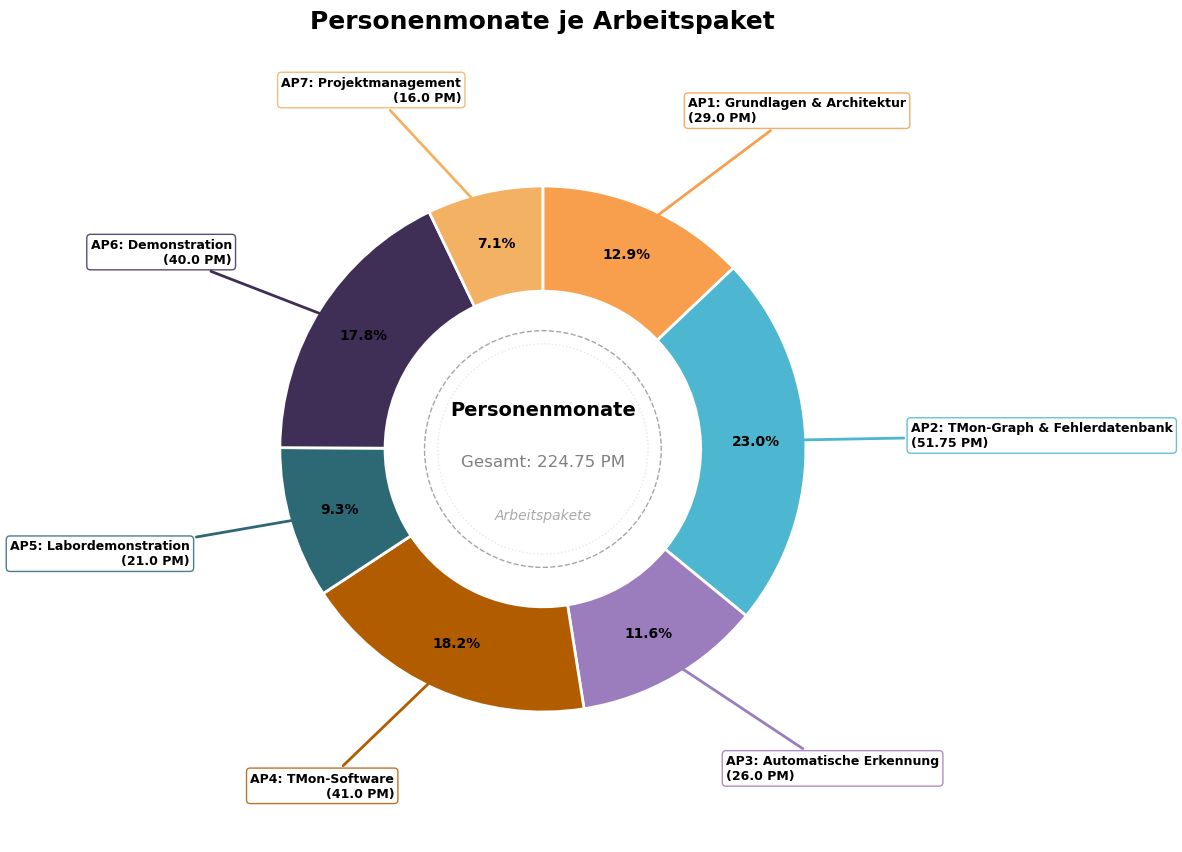

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set transparent background
plt.rcParams['savefig.transparent'] = True
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'none'

# Data
data = {
    "Arbeitspaket": [
        "AP1: Grundlagen & Architektur",
        "AP2: TMon-Graph & Fehlerdatenbank",
        "AP3: Automatische Erkennung",
        "AP4: TMon-Software",
        "AP5: Labordemonstration",
        "AP6: Demonstration",
        "AP7: Projektmanagement"
    ],
    "Summe (Personenmonate)": [29, 51.75, 26, 41, 21, 40, 16]
}
df = pd.DataFrame(data)

# Colors
colors = ['#F79F4C', '#4DB6D0', '#9B7DBE', '#B25C00', '#2C6975', '#3F2E56', '#F3B164']
total = sum(df["Summe (Personenmonate)"])

# Plot setup
fig, ax = plt.subplots(figsize=(12, 10))
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

# Donut chart
wedges, texts = ax.pie(
    df["Summe (Personenmonate)"],
    labels=None,
    startangle=90,
    colors=colors,
    counterclock=False,
    wedgeprops=dict(width=0.4, edgecolor='white', linewidth=2)
)

# Center circle (transparent)
centre_circle = plt.Circle((0, 0), 0.5, color='none')
ax.add_artist(centre_circle)

# Add decorative circles around center text
circle1 = plt.Circle((0, 0), 0.45, fill=False, edgecolor='gray', linestyle='--', linewidth=1, alpha=0.7)
circle2 = plt.Circle((0, 0), 0.4, fill=False, edgecolor='lightgray', linestyle=':', linewidth=1, alpha=0.5)
ax.add_artist(circle1)
ax.add_artist(circle2)

# Calculate better positions for percentages
for i, wedge in enumerate(wedges):
    # Calculate angular midpoint
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)
    
    # Calculate dynamic radius based on wedge size
    wedge_ratio = df["Summe (Personenmonate)"][i] / total
    r = 0.8 + (0.05 * wedge_ratio)  # Larger wedges get slightly larger radius
    
    # Position calculation
    x = r * np.cos(angle_rad)
    y = r * np.sin(angle_rad)
    
    percentage = df["Summe (Personenmonate)"][i] / total * 100
    ax.text(x, y, f"{percentage:.1f}%", ha='center', va='center',
            fontsize=10, weight='bold', color='black')

# Arrows + labels
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)
    start_x = 0.9 * np.cos(angle_rad)
    start_y = 0.9 * np.sin(angle_rad)
    end_x = 1.4 * np.cos(angle_rad)
    end_y = 1.4 * np.sin(angle_rad)
    ha = 'left' if end_x > 0 else 'right'
    ax.annotate(
        f"{df['Arbeitspaket'][i]}\n({df['Summe (Personenmonate)'][i]} PM)",
        xy=(start_x, start_y),
        xytext=(end_x, end_y),
        ha=ha,
        va='center',
        fontsize=9,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', fc='white', ec=colors[i], alpha=0.85),
        arrowprops=dict(arrowstyle='->', color=colors[i], lw=2)
    )

# Center labels with improved styling
ax.text(0, 0.15, "Personenmonate", ha='center', va='center',
        fontsize=14, weight='bold', color='black')
ax.text(0, -0.05, f"Gesamt: {total} PM", ha='center', va='center',
        fontsize=12, color='gray')
ax.text(0, -0.25, "Arbeitspakete", ha='center', va='center',
        fontsize=10, color='darkgray', style='italic')

# Title
ax.set_title("Personenmonate je Arbeitspaket", fontsize=18, weight='bold', pad=20, color='black')

# Final touch
ax.axis('equal')
plt.tight_layout()
plt.savefig('transparent_donut.png', dpi=300, transparent=True)
plt.show()